# Simple Linear Regression 

#### 작성: 고우주 | kubwa 쿱와

TV 마케팅 비용 대비 매출에 대한 예측

1. pandas를 이용한 데이터 탐색
2. 데이터프레임 구조에 대한 이해

## 1. 데이터 불러오기 및 기본 탐색

In [1]:
import pandas as pd
import numpy as np

In [2]:
advertising = pd.read_csv("data/tvmarketing.csv")

In [3]:
# Display the first 5 rows
advertising.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [4]:
# Display the last 5 rows
advertising.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [5]:
advertising.shape

(200, 2)

In [6]:
# Let's check the columns
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [7]:
# Check the shape of the DataFrame (rows, columns)
advertising.shape

(200, 2)

In [9]:
# Let's look at some statistical information about the dataframe.
advertising.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


## 2. Seaborn을 이용한 시각화

In [10]:
import seaborn as sns
%matplotlib inline

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


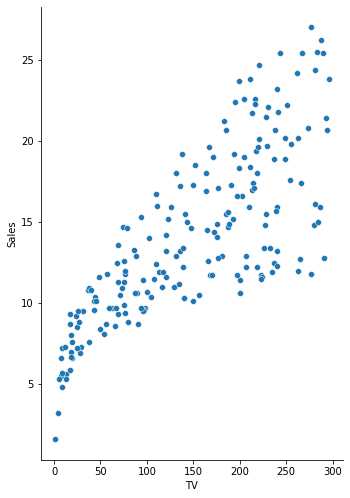

In [11]:
# 각 features와 Sales 변수와의 관계를 scatterplot 시각화
sns.pairplot(advertising, x_vars=['TV'], # pairplot을 그리면 쉽다
             y_vars='Sales',size=7, aspect=0.7, kind='scatter')

## * Simple Linear Regression 공식

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$ 다항 회귀의 경우 변수가 많아진다

-  $y$ is the response (y target)
-  $c$ is the intercept (절편)
-  $m_1$ is the coefficient for the first feature (1차 상관계수)
-  $m_n$ is the coefficient for the nth feature (n차 상관계수)<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients**(상관계수) or **model parameters**((파라미터).

## 3. 최소제곱법으로 회귀선 구하기

a: 0.04753664043301969 b: 7.032593549127705


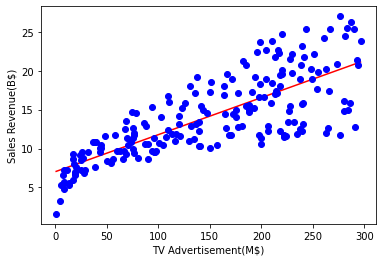

In [12]:
import matplotlib.pyplot as plt

X = advertising.TV # advertising['TV']
Y = advertising.Sales # advertising['Sales']

# X, Y의 평균을 구합니다.
x_bar = sum(X) / len(X)
y_bar = sum(Y) / len(Y)

# 최소제곱법으로 a, b를 구합니다.
a = sum([(y - y_bar) * (x - x_bar) for y, x in list(zip(Y, X))])
a /= sum([(x - x_bar) ** 2 for x in X])
b = y_bar - a * x_bar
print('a:', a, 'b:', b)

# 그래프를 그리기 위해 회귀선의 x, y 데이터를 구합니다.
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

# 붉은색 실선으로 회귀선을 그립니다.
plt.plot(line_x,line_y,'r-')

plt.plot(X,Y,'bo')
plt.xlabel('TV Advertisement(M$)')
plt.ylabel('Sales Revenue(B$)')
plt.show()

## 4. Model 구축 절차 - ```sklearn```

### - Preparing X and y

-  scikit-learn 라이브러리를 사용하려면 X (feature variable)와 y (response variable)를  NumPy 배열(arrays)로 구축
-  X, y를 pands 데이터프레임으로 전환한다, pandas는 NumPy의 array 기반으로 데이터프레임 쉽게 전환

In [14]:
# 'TV' Column을 변수 X로 지정
X = advertising['TV']

X.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [15]:
# 'Sales Column을 target y로 지정
y = advertising['Sales']

y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

### - Modeling을 위한 train/test set Split

In [31]:
# sklearn의 model_selection으로 train_test_split 불러오기

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, 
                                                    random_state=100) # random_state 인자를 동일하게 하면 동일하게 분리

# 매번 다른 값을 뽑으면 결과 값 다를 수 있기 때문이다

In [32]:
train_test_split?

In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140,)
(60,)
(140,)
(60,)


In [34]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


   #### Python Notebook Tip
- Press ‘Tab‘ to auto-fill the code
- Press ‘Tab+Shift‘ to read the documentation

In [35]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140,)
(140,)
(60,)
(60,)


In [36]:
import numpy as np

X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis] # 아무 의미 없는 축을 추가해줌 이걸 하는 이유가 뭘까? --> 
# 새로운 axis를 안하고 싶다 그러면 데이터 프레임 형으로 넣어줘도 된다

<ipython-input-36-f78770387221>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = X_train[:, np.newaxis]
<ipython-input-36-f78770387221>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_test = X_test[:, np.newaxis] # 아무 의미 없는 축을 추가해줌 이걸 하는 이유가 뭘까? -->


### - Linear Regression 모델링

In [37]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# lr에 LinearRegression() 지정
lr = LinearRegression()

# lr.fit() Model Fit 하기
lr.fit(X_train, y_train)

LinearRegression()

## 5. Coefficients Calculation

In [38]:
lr.intercept_

6.98966585741168

In [39]:
lr.coef_

array([0.04649736])

In [43]:
# Print 절편(intercept)과 coefficients(상관계수)
print(lr.intercept_)
print(lr.coef_)

6.98966585741168
[0.04649736]


$y = 6.989 + 0.0464 \times TV $<br>

Let's use this equation to predict our sales.

## 6. Predictions

In [44]:
# 예측을 위한 predictions on the testing set
y_pred = lr.predict(X_test)

In [45]:
type(y_pred)

numpy.ndarray

In [46]:
y_pred

array([ 7.35234526, 18.06533671, 13.27610876, 17.11214086, 18.22807747,
       16.60531965, 13.4620982 , 16.17754395, 17.05169429, 17.07029323,
       12.4391563 , 17.66080969,  9.60281742, 15.72186983, 11.04423554,
       11.36971705, 13.95032046, 14.90351632, 14.59198401, 12.23921766,
       16.97264878, 13.00642408, 16.07524976, 15.21969836, 15.58702749,
       17.23303399, 17.20978531, 10.49091697, 15.58702749, 12.71349072,
       10.1700852 , 10.19798361, 12.61584627, 15.74976825,  9.31453379,
       12.59259759, 11.50920913, 14.81982107, 17.33067844, 15.97295557,
       17.00519693, 15.15925179, 14.63848137, 17.14933874, 12.57864838,
       11.16047894,  7.77547122, 18.55820871, 10.27237939,  8.76586496,
       16.405381  , 14.95466341, 10.4816175 , 13.08546959, 16.78665935,
        9.05879832,  7.78942043,  8.17999824, 16.17754395, 10.9744895 ])

## 7. matplotlib를 이용한 예측결과 시각화

### - Actual vs Predicted

Text(0, 0.5, 'Sales')

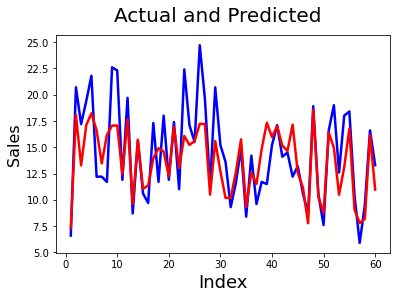

In [47]:
import matplotlib.pyplot as plt

c = [i for i in range(1, 61, 1)]  # generating index 
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20) # Plot heading 
plt.xlabel('Index', fontsize=18)  # X-label
plt.ylabel('Sales', fontsize=16)   # Y-label

### - Error terms

Text(0, 0.5, 'ytest-ypred')

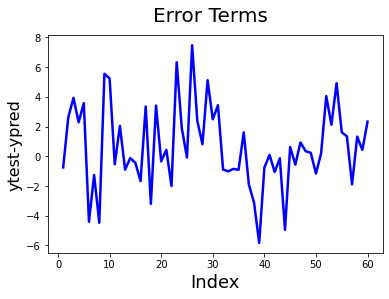

In [49]:
c = [i for i in range(1, 61, 1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20) # Plot heading 
plt.xlabel('Index', fontsize=18)              # X-label
plt.ylabel('ytest-ypred', fontsize=16)    # Y-label

## 8. Evaluation RMSE, R^2 Values

In [50]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [51]:
print('Mean_Asolute_Error:', mae)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared) # evaluation하는 부분

Mean_Asolute_Error: 2.161984932672072
Mean_Squared_Error : 7.975798532854851
r_square_value : 0.5942987267783302
